# Installation

In [1]:
!pip install pandas
!pip install opencv-python==4.6.0.66
!pip install seaborn
!pip install scikit-learn

# Import

In [2]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('C:/Users/Admin/Downloads/Thesis Code/AutismDataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0008.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0009.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0010.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0011.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\consolidated\Autistic\0012.jpg
C:/Users/Admin/D

C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.0.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.10.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.100.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1000.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1001.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1002.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1003.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1004.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1005.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1006.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1007.jpg
C:/Users/Admin/Downloads/Thesis Code/AutismDataset\train\Autistic.1008.jpg
C:/Users/Admin/Downloads/Thesis Co

ModuleNotFoundError: No module named 'keras.layers.core'

# Train & Test Directories 

In [3]:
train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

# Splitting Autistic & Non-Autistic

In [4]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in i:
        train_non_autistic.append(os.path.join(train_data, i))
    else:
        train_autistic.append(os.path.join(train_data, i))

test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in i:
        test_non_autistic.append(os.path.join(test_data, i))
    else:
        test_autistic.append(os.path.join(test_data, i))

In [5]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [6]:
test_imgs = test_autistic + test_non_autistic
random.shuffle(test_imgs)

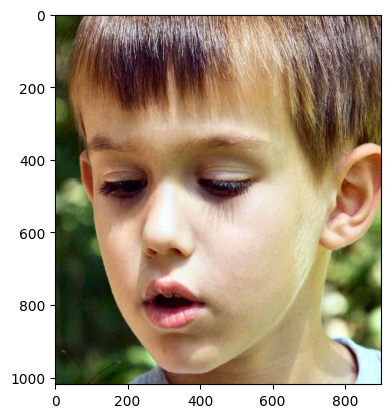

In [7]:
import matplotlib.image as mpimg
for ima in train_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

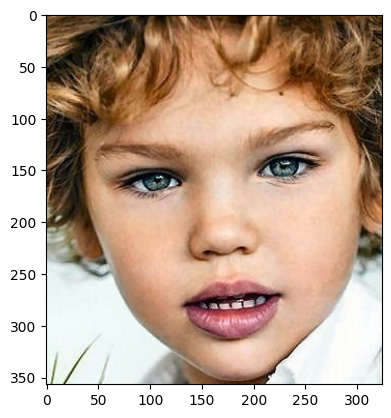

In [8]:
import matplotlib.image as mpimg
for ima in test_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Resizing The Images

In [9]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)
X_test, y_test = read_and_process_image(test_imgs)


# Validation Data

In [10]:
val_autistic = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["C:/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["C:/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [11]:
X_val, y_val = read_and_process_image(val_imgs)

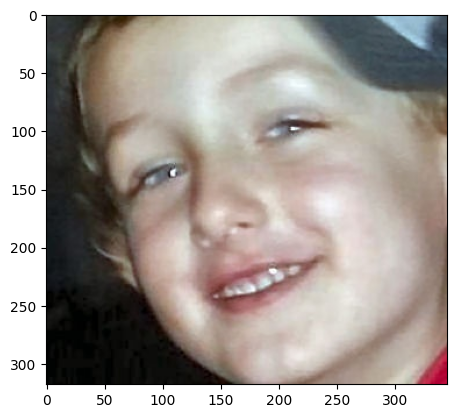

In [12]:
import matplotlib.image as mpimg
for ima in val_imgs[0:1]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

# Preprocessing 

In [13]:
from tensorflow.keras.applications.xception import preprocess_input as preprocess_input_xception

# Define a function for image preprocessing
def preprocess_image(train_data, target_size=(224, 224), grayscale=False):
    image = cv2.imread(train_data, cv2.IMREAD_COLOR)
    
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    if target_size:
        image = cv2.resize(image, target_size, interpolation=cv2.INTER_CUBIC)
    
    #Normalize pixel values
    image = preprocess_input_xception(image.copy())
    
    return image

# Preprocess training and validation data
X_train = [preprocess_image(train_data) for train_data in train_imgs]
X_test = [preprocess_image(test_data) for test_data in test_imgs]
X_val = [preprocess_image(val_data) for val_data in val_imgs]



# Converting Train & Val Data To np Array


In [14]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Data Augmentation

In [15]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Generating Larger DataSet
# ## Data Augmentation
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                   rotation_range=4,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True)

# val_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
# val_generator = val_datagen.flow(X_val, y_val, batch_size=32)
# test_generator = test_datagen.flow(X_test, y_test, batch_size=32)


# Xception

In [19]:
# from tensorflow.keras.applications import Xception
# from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

# # Load Xception base model
# base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the base model layers
# for layer in base_model.layers:
#     layer.trainable = False

# # Define the custom classification layers
# x = GlobalAveragePooling2D()(base_model.output)
# # x = Dense(256, activation='relu')(x)
# # x = Dropout(0.5)(x)
# # x = Dense(128, activation='relu')(x)
# # x = Dropout(0.3)(x)
# predictions = Dense(1, activation='sigmoid')(x)

# # Combine the base model and custom classification layers
# model = Model(inputs=base_model.input, outputs=predictions)

# # Compile the model
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# # Display model summary
# model.summary()


In [20]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.svm import SVC
import numpy as np

# Load MobileNet base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build a model to extract features
feature_extractor_model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))

# Prepare your training, validation, and test data (replace this with your actual data)
# Assuming you have X_train, X_val, and X_test as your image datasets
# Assuming X_train, X_val, and X_test have shapes (num_samples, image_height, image_width, num_channels)
# Assuming you have labels y_train, y_val, y_test
# Assuming y_train, y_val, and y_test are your labels

# Extract features from your datasets
X_train_features = feature_extractor_model.predict(X_train)
X_val_features = feature_extractor_model.predict(X_val)
X_test_features = feature_extractor_model.predict(X_test)

# Now X_train_features, X_val_features, and X_test_features contain the extracted features

# Train SVM model
svm_model = SVC(kernel='linear')  # Linear kernel
svm_model.fit(X_train_features, y_train)

# Evaluate SVM model
train_accuracy = svm_model.score(X_train_features, y_train)
val_accuracy = svm_model.score(X_val_features, y_val)
test_accuracy = svm_model.score(X_test_features, y_test)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)


10/10 [==============================] - 15s 1s/step
Train Accuracy: 0.9807086614173228
Validation Accuracy: 0.7
Test Accuracy: 0.7533333333333333


In [21]:
# Check the number of features extracted
num_train_samples, num_train_features = X_train_features.shape
num_val_samples, num_val_features = X_val_features.shape
num_test_samples, num_test_features = X_test_features.shape

print("Number of features extracted from training set:", num_train_features)
print("Number of features extracted from validation set:", num_val_features)
print("Number of features extracted from test set:", num_test_features)

Number of features extracted from training set: 2048
Number of features extracted from validation set: 2048
Number of features extracted from test set: 2048


In [17]:
# # Define number of epochs and batch size
# epochs = 20
# batch_size = 32

# # Train the model
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_val, y_val), 
#                     epochs=epochs, 
#                     batch_size=batch_size)


Epoch 1/20


80/80 [==============================] - 125s 2s/step - loss: 0.5991 - accuracy: 0.6780 - val_loss: 0.5628 - val_accuracy: 0.7100
Epoch 2/20
80/80 [==============================] - 125s 2s/step - loss: 0.5400 - accuracy: 0.7335 - val_loss: 0.5468 - val_accuracy: 0.7200
Epoch 3/20
80/80 [==============================] - 126s 2s/step - loss: 0.5154 - accuracy: 0.7496 - val_loss: 0.5376 - val_accuracy: 0.7600
Epoch 4/20
80/80 [==============================] - 124s 2s/step - loss: 0.4970 - accuracy: 0.7654 - val_loss: 0.5327 - val_accuracy: 0.7700
Epoch 5/20
80/80 [==============================] - 124s 2s/step - loss: 0.4861 - accuracy: 0.7760 - val_loss: 0.5228 - val_accuracy: 0.7700
Epoch 6/20
80/80 [==============================] - 125s 2s/step - loss: 0.4726 - accuracy: 0.7780 - val_loss: 0.5459 - val_accuracy: 0.7500
Epoch 7/20
80/80 [==============================] - 126s 2s/step - loss: 0.4651 - accuracy: 0.7835 - val_loss: 0.5150 - val_accuracy: 0.7500
Epoch 8/20


In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 11s 1s/step - loss: 0.4224 - accuracy: 0.8000
Test Loss: 0.4223746657371521
Test Accuracy: 0.800000011920929


# Shap

In [29]:
# !pip install shap

In [30]:
# import cv2
# import numpy as np
# import shap
# from tensorflow.python.ops.numpy_ops import np_config
# np_config.enable_numpy_behavior()
# import os

# img_path = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train2/Autistic-2.jpg"
# print(img_path)
# img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
# img = cv2.resize(img, (224, 224))  # Resize the image to match the expected input shape
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# img = np.array(img)

# import json

# def f(X):
#     tmp = X.copy()
#     return model(tmp)

# class_names = ['Non-Autistic','Autistic']

# # Define the input shape for the image masker
# input_shape = (224, 224, 3)

# # Define a masker that is used to mask out partitions of the input image, this one uses a blurred background
# masker = shap.maskers.Image("inpaint_telea", input_shape)

# # By default the Partition explainer is used for all partition explainer
# explainer = shap.Explainer(f, masker, output_names=class_names)

# shap_values = explainer(
#     img.reshape(1, 224, 224, 3),  # Reshape the image to match the expected input shape
#     max_evals=500,
#     outputs=shap.Explanation.argsort.flip[:1]
# )
# shap.image_plot(shap_values)
